# Load Images Into a Dataset Using ImageFolder

In [4]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

data_dir = 'E:\\GitHub\\poly-curve-detector\\DataGeneration\\plotData'

transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])

sampledataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(sampledataset, batch_size=128)

### Select 2 Random Images Loaded Into Dataset and Display to Verify 

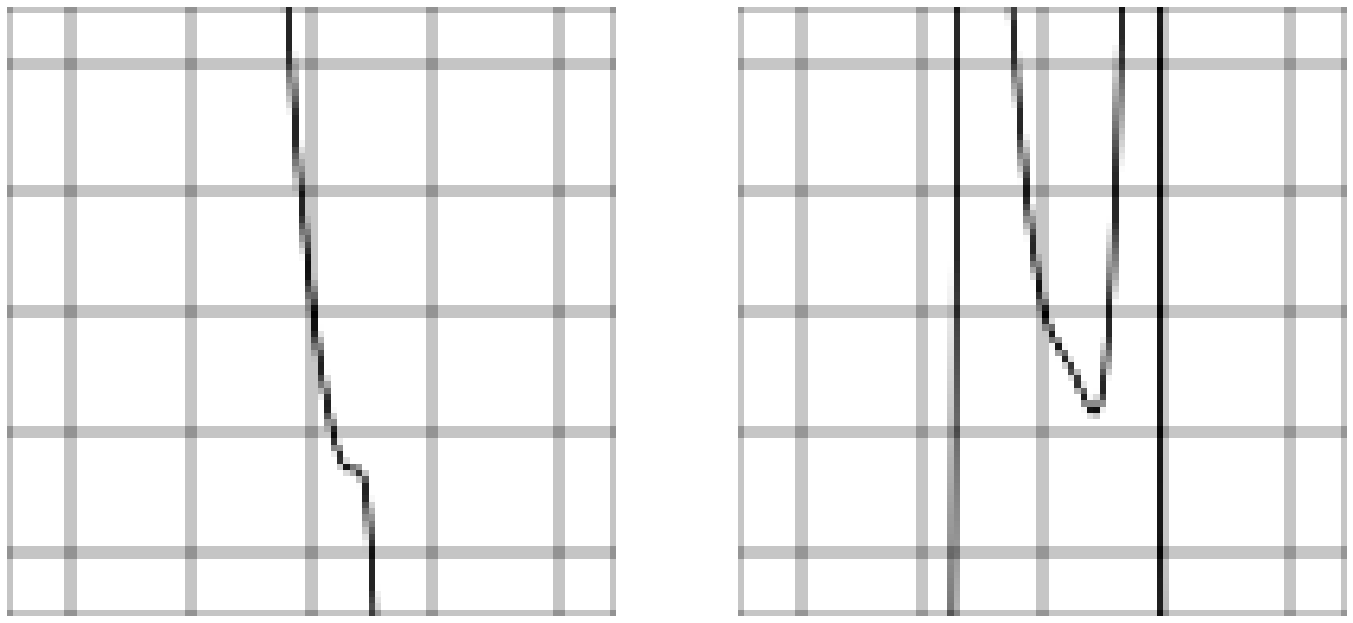

In [5]:
images, labels = next(iter(dataloader))
figure = plt.figure(figsize=(24,24))
plots = 2
for i in range(1, plots + 1):
    sample_idx = torch.randint(len(sampledataset), size=(1,)).item()
    img, label = sampledataset[sample_idx]
    figure.add_subplot(1, plots, i)
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0), cmap="gray")
    
plt.show()